# Get started

Imoprt modules we'll need to get started



[Requests](http://docs.python-requests.org/en/master/)

[Beautiful soup](https://www.crummy.com/software/BeautifulSoup/)

[Pandas](https://pandas.pydata.org/)

[NLTK](https://www.nltk.org/)


When you have time go read more about them from the links above!

In [ ]:
# import request & beautiful soup
# request is for getting content from a URL
# beautiful soup is used to parse through the HTML we get from requests

import requests
from bs4 import BeautifulSoup

Make a request to this page [sageelliott.com/scrape/](https://sageelliott.com/scrape/)

This page has elements I made that will be good practice for web scraping


In [ ]:
# Make the request to a url
# Assign it to a variable 'r'

r = requests.get('https://sageelliott.com/scrape/')  # https://gumdropsteve.github.io/blog/

In [ ]:
type(r)

requests.models.Response

What's that? https://requests.readthedocs.io/en/v0.6.2/api/#requests.models.Response

In [ ]:
r.cookies

<RequestsCookieJar[]>

In [ ]:
# r = requests.get('https://sageelliott.com/scrape/', cookies=True)  
# r.cookies
# https://requests.readthedocs.io/en/latest/_modules/requests/cookies/

In [ ]:
# Lets look at what the request content looks like
r.content

b'<!DOCTYPE html>\r\n<html>\r\n\r\n  <head>\r\n  <meta charset="utf-8">\r\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n  <meta name="viewport" content="width=device-width, initial-scale=1">\r\n\r\n  <title>Web Scraping | Sage Elliott \xf0\x9f\xa5\x91</title>\r\n  <meta name="description" content="I make things.">\r\n\r\n  <link rel="stylesheet" href="/css/main.css">\r\n  <link rel="canonical" href="http://sageelliott.com/scrape/">\r\n  <link rel="alternate" type="application/rss+xml" title="Sage Elliott \xf0\x9f\xa5\x91" href="http://sageelliott.com/feed.xml">\r\n  <script src="https://code.jquery.com/jquery-2.1.3.min.js"></script>\r\n  <script src="/js/bootstrap.min.js"></script>\r\n  <script src="/js/script.js"></script>\r\n  <link rel="stylesheet" href="/css/bootstrap.min.css">\r\n  <link rel="stylesheet" href="/css/bootstrap-theme.min.css">\r\n  <link rel="stylesheet" href="/css/style.css">\r\n  <link rel="stylesheet" href="/css/responsive.css">\r\n  <link href=\'htt

#### That is a really big, really ugly string! 

Lets use Beautiful Soup on content from requests 
- This will make it much more readble when we print it out and allow us to use more Beautifulsoup functionality

In [ ]:
# identify/tag the content (same thing we just printed)
c = r.content

# use Beautifulsoup on content from request (again, content we just printed)
soup = BeautifulSoup(c)

In [ ]:
# Look at the content formatted with Beautifulsoup
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Web Scraping | Sage Elliott 🥑</title>
<meta content="I make things." name="description"/>
<link href="/css/main.css" rel="stylesheet"/>
<link href="http://sageelliott.com/scrape/" rel="canonical"/>
<link href="http://sageelliott.com/feed.xml" rel="alternate" title="Sage Elliott 🥑" type="application/rss+xml"/>
<script src="https://code.jquery.com/jquery-2.1.3.min.js"></script>
<script src="/js/bootstrap.min.js"></script>
<script src="/js/script.js"></script>
<link href="/css/bootstrap.min.css" rel="stylesheet"/>
<link href="/css/bootstrap-theme.min.css" rel="stylesheet"/>
<link href="/css/style.css" rel="stylesheet"/>
<link href="/css/responsive.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400italic,700italic,400,700|Alegreya+SC" rel="stylesheet"

#### Uhhhh.. What?
- That's difficult to read...
  - We can make it look better (more readable) by using the prettify() function from Beautiful soup 
    - prettify() indents HTML like it should be in the web page
      - i.e. you can think "this is how the code actually looks"


`.prettify()` makes the code look how it does when you inspect it in chrome or firefox or etc...


In [ ]:
# This can make reading teh HTML a little be easier
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Web Scraping | Sage Elliott 🥑
  </title>
  <meta content="I make things." name="description"/>
  <link href="/css/main.css" rel="stylesheet"/>
  <link href="http://sageelliott.com/scrape/" rel="canonical"/>
  <link href="http://sageelliott.com/feed.xml" rel="alternate" title="Sage Elliott 🥑" type="application/rss+xml"/>
  <script src="https://code.jquery.com/jquery-2.1.3.min.js">
  </script>
  <script src="/js/bootstrap.min.js">
  </script>
  <script src="/js/script.js">
  </script>
  <link href="/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="/css/bootstrap-theme.min.css" rel="stylesheet"/>
  <link href="/css/style.css" rel="stylesheet"/>
  <link href="/css/responsive.css" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400itali

Often the content that you want to scrape will be inside a tag like `div` or similar element. 

- In this case when we look at our HTML we see that the actual content of the page is inside of a `div` with a class of `main-content`. 

- Lets grab all the content inside that `div` and save it to a variable. 


**We're going from this**

In [ ]:
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Web Scraping | Sage Elliott 🥑</title>
<meta content="I make things." name="description"/>
<link href="/css/main.css" rel="stylesheet"/>
<link href="http://sageelliott.com/scrape/" rel="canonical"/>
<link href="http://sageelliott.com/feed.xml" rel="alternate" title="Sage Elliott 🥑" type="application/rss+xml"/>
<script src="https://code.jquery.com/jquery-2.1.3.min.js"></script>
<script src="/js/bootstrap.min.js"></script>
<script src="/js/script.js"></script>
<link href="/css/bootstrap.min.css" rel="stylesheet"/>
<link href="/css/bootstrap-theme.min.css" rel="stylesheet"/>
<link href="/css/style.css" rel="stylesheet"/>
<link href="/css/responsive.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Pathway+Gothic+One|Alegreya:400italic,700italic,400,700|Alegreya+SC" rel="stylesheet"

**To this**

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find

In [ ]:
# get elements within the 'main-content' tag
main_content = soup.find('div', attrs={'class': 'main-content'})

print(main_content)

<div class="main-content">
<h1>Lots of stuff to try web scraping on!</h1>
<p>This page is full of different tags that you will commonly see
    out in the wild on the web!</p>
<h1>Example headlines</h1>
<h2 class="headline">I love this!</h2>
<h2 class="headline">I hate this so much!</h2>
<h2 class="headline">The dumbest thing happened</h2>
<h2 class="headline">This is a great workshop!</h2>
<h2 class="headline">This workshop is horrible</h2>
<h2 class="headline">I'm tired...</h2>
<h2 class="headline">This thing is ok...</h2>
<h1>Example unordered list</h1>
<ul>
<li>Elon Musk is worth $21,000,000,000</li>
<li>Jeff Bezos is worth $137,000,400,000 </li>
<li>Bill Gates is worth $95,000,000,000</li>
<li>Mark Zuckerburg is worth $54,600,000,000</li>
</ul>
<h1>Example links</h1>
<a href="https://www.galvanize.com/data-science-prep">Data Science Free prep</a>
<a href="http://docs.python-requests.org/en/master/">Python Requests</a>
<a href="https://www.crummy.com/software/BeautifulSoup/">Beauti

Lets drill deeper down into our content and look at different ways of selecting elements within our main-content div.

We want to get just our items inside of the list

I'm going to be using examples like the above for most of this workshop, but I want to show that you could also chain the elements like the example below:

Lets get the headline elements

When we look at the HTML we can see that they all have `h2` tags. 


What is "h2"
- idk, ask a web-dev...
    
# Header
## Header 2
### Header 3
#### something smaller than header
- **Not the same as bold**

In [ ]:
# Try to get h2 ("Header 2") elements
content = main_content.find('h2').text

print(content)

I love this!


Oh no! It looks like when using `.find()` it only returns the first matching element on the page.

We can get all the matching elements by using the`.find_all()` method

In [ ]:
# get all the h2s on the page and display each one
content = main_content.find_all('h2')

print(content)


[<h2 class="headline">I love this!</h2>, <h2 class="headline">I hate this so much!</h2>, <h2 class="headline">The dumbest thing happened</h2>, <h2 class="headline">This is a great workshop!</h2>, <h2 class="headline">This workshop is horrible</h2>, <h2 class="headline">I'm tired...</h2>, <h2 class="headline">This thing is ok...</h2>]


In [ ]:
content

[<h2 class="headline">I love this!</h2>,
 <h2 class="headline">I hate this so much!</h2>,
 <h2 class="headline">The dumbest thing happened</h2>,
 <h2 class="headline">This is a great workshop!</h2>,
 <h2 class="headline">This workshop is horrible</h2>,
 <h2 class="headline">I'm tired...</h2>,
 <h2 class="headline">This thing is ok...</h2>]

Notice when we print out content above it have the HTML h2 elements seperated by commas inside brackets []. This is called a `list`. Its ofen used to store multiple values in. 

Lists are iterable, and we can go through each item inside to print them out



In [ ]:
# Iterate content list and print out text inside each h2 element

for h2 in content:
    print(h2.text)

I love this!
I hate this so much!
The dumbest thing happened
This is a great workshop!
This workshop is horrible
I'm tired...
This thing is ok...


In [ ]:
[x.text for x in content]

['I love this!',
 'I hate this so much!',
 'The dumbest thing happened',
 'This is a great workshop!',
 'This workshop is horrible',
 "I'm tired...",
 'This thing is ok...']

# Text Analysis

Lets do some sentiment analysis on our headlines `h2` elements

Maybe we're looking at a list of News headlines and we only want to read the ones we think are positive

In [ ]:
# get all the h2s on the page and display each one
content = main_content.find_all('h2')

In [ ]:
print(content)

[<h2 class="headline">I love this!</h2>, <h2 class="headline">I hate this so much!</h2>, <h2 class="headline">The dumbest thing happened</h2>, <h2 class="headline">This is a great workshop!</h2>, <h2 class="headline">This workshop is horrible</h2>, <h2 class="headline">I'm tired...</h2>, <h2 class="headline">This thing is ok...</h2>]


In [ ]:
# start a collection (list) for dataset 
dataset = []

# go through each item in content
for h2 in content:
    # identify the text of that item
    text = h2.text
    # add that text to the dataset (list)
    dataset.append(text)

In [ ]:
# show me the whole list
print(dataset)

['I love this!', 'I hate this so much!', 'The dumbest thing happened', 'This is a great workshop!', 'This workshop is horrible', "I'm tired...", 'This thing is ok...']


In [ ]:
# show me each item
for item in dataset:
  print(item)

I love this!
I hate this so much!
The dumbest thing happened
This is a great workshop!
This workshop is horrible
I'm tired...
This thing is ok...


# Optional Assignment
Pull the `li` net worths..

In [ ]:
# your code here

In [ ]:
# content = main_content.find_all('li')

# [x.text for x in content]

## Natural Language Processing
Import [NLTK](https://www.nltk.org/) (Natural Language Toolkit) python module

Yet again we're only going to use just a tiny bit of NLTK, but if you're intertested in Natural Language Processing you should totally read more about it!!!

In [ ]:
import pandas as pd
import nltk
# basically an import (already known to ntlk)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment(sentence):
    # id/tag the analyzer
    sentiment = SentimentIntensityAnalyzer()
    # make a score on the sentence
    score = sentiment.polarity_scores(sentence)
    # return the analyzer's score of the sentence
    return score 

https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.vader.SentimentIntensityAnalyzer

In [ ]:
for headline in dataset:
  print("\n")
  print(headline)
  print(sentiment(headline))



I love this!
{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}


I hate this so much!
{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'compound': -0.6114}


The dumbest thing happened
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}


This is a great workshop!
{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


This workshop is horrible
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


I'm tired...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


This thing is ok...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


### do that without all that work?
- yes, it's doable
  - for example, if we happened to have all the headlines in a list

In [ ]:
# make a list of the headlines
dataset = ['I love this', 'I hate this so much', 
           'The dumbest thing happened', 'This is a great workshop', 
           'This workshop is horrible', "I'm tired", 'This thing is ok',
           "Tomorrow is Tuesday", "He was big mad but later was big happy"]

# import sentiment analyzer (just like above)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# define sentiment function (just like above)
def sentiment(sentence):    
    sentiment = SentimentIntensityAnalyzer()
    score = sentiment.polarity_scores(sentence)
    return score

In [ ]:
# go through each 'headline' in the dataset
for headline in dataset:
  # print a blank line
  print("\n")
  # print the headline
  print(headline)
  # print the outcome of sentiment() function on that headline
  print(sentiment(headline))



I love this
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}


I hate this so much
{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}


The dumbest thing happened
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}


This is a great workshop
{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}


This workshop is horrible
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


I'm tired
{'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}


This thing is ok
{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}


Tomorrow is Tuesday
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


He was big mad but later was big happy
{'neg': 0.148, 'neu': 0.495, 'pos': 0.357, 'compound': 0.6059}


### Can the results look better?
- Yes, lets use `Pandas` to make our output better


Putting these things into a list...
```
...

{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

{'neg': 0.148, 'neu': 0.495, 'pos': 0.357, 'compound': 0.6059}
```

In [ ]:
import pandas as pd

# make a list of the results of sentiment on each "headline" in the dataset
nltk_results = [sentiment(headline) for headline in dataset]

# print out those results
print(nltk_results)

[{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}, {'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}, {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}, {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}, {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}, {'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.4404}, {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.296}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.148, 'neu': 0.495, 'pos': 0.357, 'compound': 0.6059}]


In [ ]:
# make a pandas dataframe of the the results
results_df = pd.DataFrame(nltk_results)
# make a single column dataframe of the sentences & title column 'headline'
text_df = pd.DataFrame(dataset, columns = ['headline'])

# combine those two dataframes 
nltk_df = text_df.join(results_df)

# display the combined dataframe
nltk_df

,headline,neg,neu,pos,compound
0,I love this,0.000,0.192,0.808,0.6369
1,I hate this so much,0.552,0.448,0.000,-0.5719
2,The dumbest thing happened,0.524,0.476,0.000,-0.5106
3,This is a great workshop,0.000,0.423,0.577,0.6249
4,This workshop is horrible,0.538,0.462,0.000,-0.5423
5,I'm tired,0.744,0.256,0.000,-0.4404
6,This thing is ok,0.000,0.577,0.423,0.2960
7,Tomorrow is Tuesday,0.000,1.000,0.000,0.0000
8,He was big mad but later was big happy,0.148,0.495,0.357,0.6059


#### Let's plot out those results

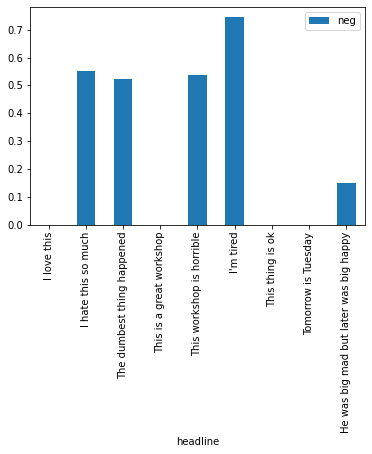

In [ ]:
nltk_df.plot(kind='bar', x='headline', y='neg');

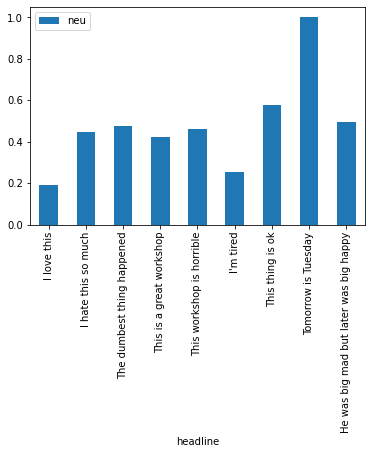

In [ ]:
nltk_df.plot(kind='bar', x = 'headline', y = 'neu');

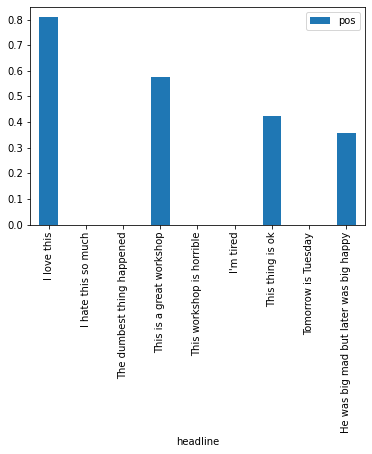

In [ ]:
nltk_df.plot(kind='bar', x = 'headline', y = 'pos');

# Back to GitHub repo

https://github.com/gumdropsteve/intro-data-science/tree/master/intro_machine_learning
  

Optional assignment: https://youtu.be/SPtEh9c5Xf4

# Extended...

In [ ]:
r = requests.get('http://classics.mit.edu/Tzu/artwar.html')

r

<Response [200]>

In [ ]:
r.content

b'<HTML>\n\n<HEAD>\n<!--The Internet Classics Archive by Daniel C. Stevenson, Web Atomics. World Wide Web presentation is copyright (C) 1994-2009, Daniel C. Stevenson, Web Atomics. All rights reserved under international and pan-American copyright conventions, including the right of reproduction in whole or in part in any form. Direct permission requests to classics@classics.mit.edu. Translation of "The Deeds of the Divine Augustus" by Augustus is copyright (C) Thomas Bushnell, BSG.-->\n<LINK REV="made" HREF="mailto:classics@classics.mit.edu">\n<LINK REV="owns" HREF="mailto:classics@classics.mit.edu">\n<STYLE TYPE="text/css">\n<!--\nA:link {text-decoration:none}\nA:visited {text-decoration:none}\nA:active {text-decoration:none}\n-->\n</STYLE>\n\n<SCRIPT LANGUAGE="JavaScript">\n<!-- begin hiding\nfunction openPopup() {\n    JSreferer=window.location.href;\n    popupWindow=window.open(\'/cgi-bin/popup.cgi\',\'popupWindow\',\'toolbar=no,directories=no,status=yes,menubar=no,scrollbars=auto

In [ ]:
content = r.content

soup = BeautifulSoup(content)

In [ ]:
# print(soup.prettify())

In [ ]:
# soup.text

In [ ]:
print(soup.text.split('\n'))

['', '', '', '', '', '', '<!--', 'A:link {text-decoration:none}', 'A:visited {text-decoration:none}', 'A:active {text-decoration:none}', '-->', '', '', '<!-- begin hiding', 'function openPopup() {', '    JSreferer=window.location.href;', "    popupWindow=window.open('/cgi-bin/popup.cgi','popupWindow','toolbar=no,directories=no,status=yes,menubar=no,scrollbars=auto,resizable=yes,width=320,height=180');", '    popupWindow.opener=self;', "    popupWindow.opener.name='opener';", '}', '// end hiding -->', '', '', '', '', 'The Internet Classics Archive | The Art of War by Sun Tzu', '', '', '', '', '', 'Home\xa0', '', 'Browse andComment', '', 'Search\xa0', '', 'Buy Books andCD-ROMs', '', 'Help\xa0', '', '', '', '', 'The Art of War', 'By Sun Tzu', 'Commentary: Many comments have been posted about', 'The Art of War.', '', 'Download: A 60k', 'text-only version is available for download.', '', '', 'The Art of War', 'By Sun Tzu', '', 'Translated by Lionel Giles', '', 'I. Laying Plans', '1. Sun Tzu

In [ ]:
soup.find('b')

<b>The Art of War</b>

In [ ]:
# soup.find_all('b')

That gives us the chapters and the sentence numbers... How do we get the sentences??

In [ ]:
# [b.text for b in soup.find_all('b')]

In [ ]:
[b.text for b in soup.find_all('a') if b.text != '']

['Home',
 'Browse andComment',
 'Search',
 'Buy Books andCD-ROMs',
 'Help',
 'available for download',
 'Home',
 'Browse andComment',
 'Search',
 'Buy Books andCD-ROMs',
 'Help',
 '© 1994-2009']

In [ ]:
soup.find('a', attrs={'name': '88'})

<a name="88"></a>

In [ ]:
soup.find('a', attrs={'name': '88'}).text

''

In [ ]:
print(''.join(soup.text.split('\n')))

<!--A:link {text-decoration:none}A:visited {text-decoration:none}A:active {text-decoration:none}--><!-- begin hidingfunction openPopup() {    JSreferer=window.location.href;    popupWindow=window.open('/cgi-bin/popup.cgi','popupWindow','toolbar=no,directories=no,status=yes,menubar=no,scrollbars=auto,resizable=yes,width=320,height=180');    popupWindow.opener=self;    popupWindow.opener.name='opener';}// end hiding -->The Internet Classics Archive | The Art of War by Sun TzuHome Browse andCommentSearch Buy Books andCD-ROMsHelp The Art of WarBy Sun TzuCommentary: Many comments have been posted aboutThe Art of War.Download: A 60ktext-only version is available for download.The Art of WarBy Sun TzuTranslated by Lionel GilesI. Laying Plans1. Sun Tzu said:  The art of war is of vital importance to the State.2. It is a matter of life and death, a road either to safety or to ruin.  Hence it is a subject of inquiry which can on no account be neglected.3. The art of war, then, is governed by five

In [ ]:
soup.find('"')

In [ ]:
soup.find('"').text

AttributeError: ignored

In [ ]:
soup.find('"') == None

True

In [ ]:
soup.find('\"')

In [ ]:
soup.find_all('#text')

[]

In [ ]:
# soup.text.split('\n')

In [ ]:
# ' '.join(soup.text.split('\n'))

In [ ]:
# ' '.join(soup.text.split('\n')).split('.')

In [ ]:
# soup.text.split('.')

In [ ]:
# soup.find_all('b')

In [ ]:
# # cut out intro stuff
# soup.text.split('\n')[58:]

In [ ]:
# soup.text.split("'")  # issue when words like one's

In [ ]:
# ''.join(soup.text.split("'")[8:])

In [ ]:
# ''.join(soup.text.split("'")[8:]).replace('\n', '')

In [ ]:
# ''.join(soup.text.split("'")[8:]).replace('\n', '').split('.')

Getting rid of number lines...

In [ ]:
sentences = []

text_list = ''.join(soup.text.split("'")[8:]).replace('\n', '').split('.')

for line in text_list:
    try:
        int(line)
    except:
        sentences.append(line)

# sentences

Fixing number lines like ` '"19',`

In [ ]:
sentences = []

text_list = ''.join(soup.text.split("'")[8:]).replace('\n', '').split('.')

for line in text_list:
    try:
        int(line)
    except:
        try:
            int(line.replace('"', ''))
        except:
            sentences.append(line)

# sentences

Getting rid of roman numerals e.g. `XII`

In [ ]:
rn = ['I', 'II', "III", 'IV', 'V', 'VI', "VII", 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII']

sentences = []

text_list = ''.join(soup.text.split("'")[8:]).replace('\n', '').split('.')

for line in text_list:
    try:
        int(line)
    except:
        try:
            int(line.replace('"', ''))
        except:
            if line not in rn:
                sentences.append(line)

# sentences

Getting rid of ` 'THE ENDHome\xa0Browse andCommentSearch\xa0Buy Books andCD-ROMsHelp\xa0© 1994-2009'`

In [ ]:
rn = ['I', 'II', "III", 'IV', 'V', 'VI', "VII", 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII']

sentences = []

text_list = ''.join(soup.text.split("'")[8:]).replace('\n', '').split('.')

for line in text_list:
    try:
        int(line)
    except:
        try:
            int(line.replace('"', ''))
        except:
            if line not in rn:
                sentences.append(line)

sentences = sentences[:-1]

# sentences

Fixing spacing...

In [ ]:
rn = ['I', 'II', "III", 'IV', 'V', 'VI', "VII", 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII']

sentences = []

text_list = ''.join(soup.text.split("'")[8:]).replace('\n', '').split('.')

for line in text_list:
    try:
        int(line)
    except:
        try:
            int(line.replace('"', ''))
        except:
            if line not in rn:
                sentences.append(line)

sentences = sentences[:-1]

sentences = [s.strip() for s in sentences]

sentences

[';}// end hiding -->The Internet Classics Archive | The Art of War by Sun TzuHome\xa0Browse andCommentSearch\xa0Buy Books andCD-ROMsHelp\xa0The Art of WarBy Sun TzuCommentary: Many comments have been posted aboutThe Art of War',
 'Download: A 60ktext-only version is available for download',
 'The Art of WarBy Sun TzuTranslated by Lionel GilesI',
 'Laying Plans1',
 'Sun Tzu said:  The art of war is of vital importance to the State',
 'It is a matter of life and death, a road either to safety or to ruin',
 'Hence it is a subject of inquiry which can on no account be neglected',
 'The art of war, then, is governed by five constant factors, to be taken into account in ones deliberations, when seeking to determine the conditions obtaining in the field',
 'These are:  (1) The Moral Law; (2) Heaven; (3) Earth; (4) The Commander; (5) Method and discipline',
 '5,6',
 'The Moral Law causes the people to be in complete accord with their ruler, so that they will follow him regardless of their liv

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# define sentiment function (just like above)
def sentiment(sentence):    
    sentiment = SentimentIntensityAnalyzer()
    score = sentiment.polarity_scores(sentence)
    return score
    
# go through each 'headline' in the dataset
for line in sentences:
  # print a blank line
  print("\n")
  # print the headline
  print(line)
  # print the outcome of sentiment() function on that headline
  print(sentiment(line))



;}// end hiding -->The Internet Classics Archive | The Art of War by Sun TzuHome Browse andCommentSearch Buy Books andCD-ROMsHelp The Art of WarBy Sun TzuCommentary: Many comments have been posted aboutThe Art of War
{'neg': 0.244, 'neu': 0.756, 'pos': 0.0, 'compound': -0.875}


Download: A 60ktext-only version is available for download
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


The Art of WarBy Sun TzuTranslated by Lionel GilesI
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Laying Plans1
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Sun Tzu said:  The art of war is of vital importance to the State
{'neg': 0.199, 'neu': 0.561, 'pos': 0.24, 'compound': -0.0516}


It is a matter of life and death, a road either to safety or to ruin
{'neg': 0.356, 'neu': 0.463, 'pos': 0.181, 'compound': -0.7003}


Hence it is a subject of inquiry which can on no account be neglected
{'neg': 0.337, 'neu': 0.663, 'pos': 0.0, 'compound': -0.6808}


The art of war, then, is 

In [ ]:
nltk_results = [sentiment(line) for line in sentences]

# make a pandas dataframe of the the results
results_df = pd.DataFrame(nltk_results)
# make a single column dataframe of the sentences & title column 'headline'
text_df = pd.DataFrame(sentences, columns = ['line'])

# combine those two dataframes 
nltk_df = text_df.join(results_df)

# display the combined dataframe
nltk_df

,line,neg,neu,pos,compound
0,;}// end hiding -->The Internet Classics Archi...,0.244,0.756,0.000,-0.8750
1,Download: A 60ktext-only version is available ...,0.000,1.000,0.000,0.0000
2,The Art of WarBy Sun TzuTranslated by Lionel G...,0.000,1.000,0.000,0.0000
3,Laying Plans1,0.000,1.000,0.000,0.0000
4,Sun Tzu said: The art of war is of vital impo...,0.199,0.561,0.240,-0.0516
...,...,...,...,...,...
531,Hence it is essential that the converted spy b...,0.000,1.000,0.000,0.0000
532,"Of old, the rise of the Yin dynasty was due to...",0.000,1.000,0.000,0.0000
533,"Likewise, the rise of the Chou dynasty was due...",0.000,1.000,0.000,0.0000
534,Hence it is only the enlightened ruler and the...,0.000,0.658,0.342,0.9260


In [ ]:
nltk_df.sample(5)

,line,neg,neu,pos,compound
281,These are the four useful branches of military...,0.000,0.861,0.139,0.4404
36,"Thus do many calculations lead to victory, and...",0.192,0.723,0.086,-0.5697
390,If asked how to cope with a great host of the ...,0.129,0.741,0.131,0.0258
57,Hence a wise general makes a point of foraging...,0.240,0.548,0.212,-0.1027
22,All warfare is based on deception,0.560,0.440,0.000,-0.6249


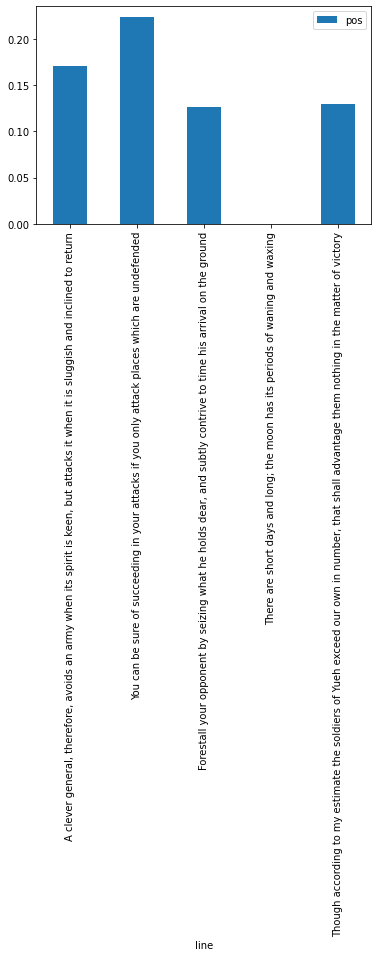

In [ ]:
nltk_df.sample(5).plot(kind='bar', x='line', y='pos');